Handwritten Character Recognition Model

    Importing Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
from tqdm import tqdm
import random
import os

from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation
from keras import optimizers
from keras.src.legacy.preprocessing.image import ImageDataGenerator


In [37]:
letters = pd.read_csv('english_char\english.csv')
letters.head()

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


In [38]:
classes = letters["label"].unique()
print(classes)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


    Recognizing Image files and randomizing selection

In [ ]:
datadirectory = 'english_char'
rand = random.sample(range(len(letters)), 500)
validation_set = pd.DataFrame(letters.iloc[rand, :].values, columns=['image', 'label'])
letters.drop(rand, inplace=True)
rand = random.sample(range(len(validation_set)), 5)
test_set = pd.DataFrame(validation_set.iloc[rand, :].values, columns=['image', 'label'])
validation_set.drop(rand, inplace=True)
validation_set

,image,label
0,Img/img026-017.png,P
1,Img/img032-008.png,V
2,Img/img048-005.png,l
3,Img/img009-045.png,8
4,Img/img012-051.png,B
...,...,...
495,Img/img048-041.png,l
496,Img/img057-053.png,u
497,Img/img006-003.png,5
498,Img/img002-030.png,1


In [40]:
train_data_generator = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2)
data_generator = ImageDataGenerator(rescale=1/255)
training_data_frame = train_data_generator.flow_from_dataframe(dataframe=letters, directory=datadirectory, x_col='image', y_col='label', 
target_size=(64, 64), class_mode='categorical')
validation_data_frame = data_generator.flow_from_dataframe(dataframe=validation_set, directory=datadirectory, x_col='image', y_col='label', 
target_size=(64, 64), class_mode='categorical')
test_data_frame = data_generator.flow_from_dataframe(dataframe=test_set, directory=datadirectory, x_col='image', y_col='label', 
target_size=(64, 64), class_mode='categorical', shuffle=False)

Found 2910 validated image filenames belonging to 62 classes.
Found 495 validated image filenames belonging to 62 classes.
Found 5 validated image filenames belonging to 5 classes.


    Model Creation with 70 epochs

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(62, activation='softmax'))

model.compile(optimizers.RMSprop(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

C:\Users\Rosita\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
history = model.fit(training_data_frame, validation_data=validation_data_frame, epochs=70)


C:\Users\Rosita\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/70
91/91 ━━━━━━━━━━━━━━━━━━━━ 38s 400ms/step - accuracy: 0.0145 - loss: 4.1306 - val_accuracy: 0.0202 - val_loss: 4.1277
Epoch 2/70
91/91 ━━━━━━━━━━━━━━━━━━━━ 35s 388ms/step - accuracy: 0.0147 - loss: 4.1264 - val_accuracy: 0.0323 - val_loss: 4.1266
Epoch 3/70
91/91 ━━━━━━━━━━━━━━━━━━━━ 36s 399ms/step - accuracy: 0.0264 - loss: 4.1251 - val_accuracy: 0.0202 - val_loss: 4.1213
Epoch 4/70
91/91 ━━━━━━━━━━━━━━━━━━━━ 34s 377ms/step - accuracy: 0.0255 - loss: 4.1048 - val_accuracy: 0.0242 - val_loss: 4.0445
Epoch 5/70
91/91 ━━━━━━━━━━━━━━━━━━━━ 34s 378ms/step - accuracy: 0.0436 - loss: 3.9917 - val_accuracy: 0.1414 - val_loss: 3.7689
Epoch 6/70
91/91 ━━━━━━━━━━━━━━━━━━━━ 34s 378ms/step - accuracy: 0.0883 - loss: 3.7927 - val_accuracy: 0.2061 - val_loss: 3.4531
Epoch 7/70
91/91 ━━━━━━━━━━━━━━━━━━━━ 35s 381ms/step - accuracy: 0.1111 - loss: 3.6342 - val_accuracy: 0.2384 - val_loss: 3.2726
Epoch 8/70
91/91 ━━━━━━━━━━━━━━━━━━━━ 34s 377ms/step - accuracy: 0.1402 - loss: 3.4756 - val_accu

In [46]:
model.save('model.h5')
model = load_model('model.h5')

    Checking 5 Random pictures for predictions

Prediction Dict:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35, 'a': 36, 'b': 37, 'c': 38, 'd': 39, 'e': 40, 'f': 41, 'g': 42, 'h': 43, 'i': 44, 'j': 45, 'k': 46, 'l': 47, 'm': 48, 'n': 49, 'o': 50, 'p': 51, 'q': 52, 'r': 53, 's': 54, 't': 55, 'u': 56, 'v': 57, 'w': 58, 'x': 59, 'y': 60, 'z': 61}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Max index:  [38, 20, 24, 17, 4]


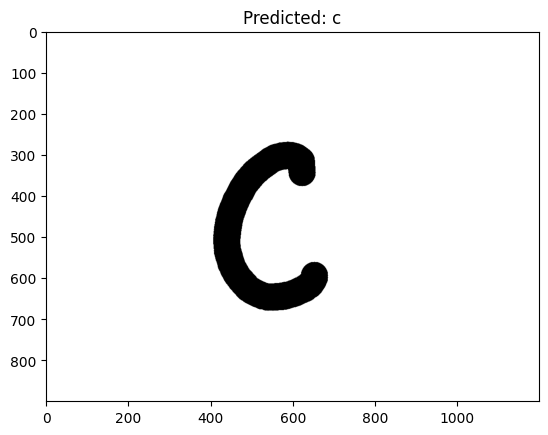

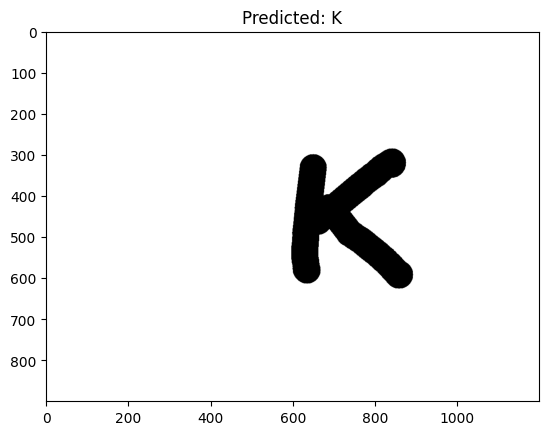

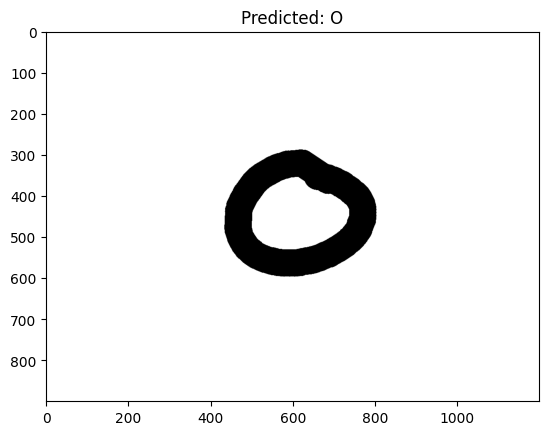

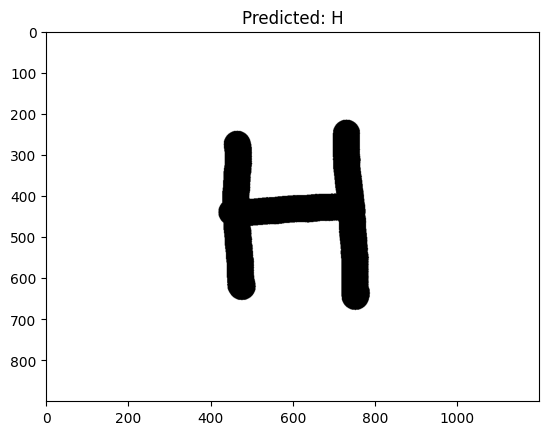

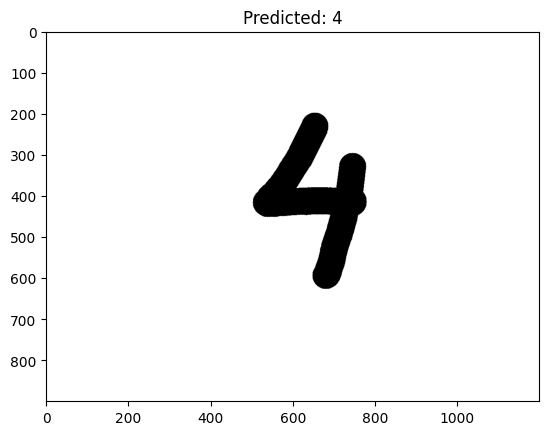

In [47]:
print("Prediction Dict: ", training_data_frame.class_indices)
pred = model.predict(test_data_frame)
classDict = {
            0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9", 10: "A",
            11: "B", 12: "C", 13: "D", 14: "E", 15: "F", 16: "G", 17: "H", 18: "I", 19: "J", 20: "K",
            21: "L", 22: "M", 23: "N", 24: "O", 25: "P", 26: "Q", 27: "R", 28: "S", 29: "T", 30: "U",
            31: "V", 32: "W", 33: "X", 34: "Y", 35: "Z", 36: "a", 37: "b", 38: "c", 39: "d", 40: "e",
            41: "f", 42: "g", 43: "h", 44: "i", 45: "j", 46: "k", 47: "l", 48: "m", 49: "n", 50: "o",
            51: "p", 52: "q", 53: "r", 54: "s", 55: "t", 56: "u", 57: "v", 58: "w", 59: "x", 60: "y",
            61: "z"}

outputDf = pd.DataFrame(pred)
maxIndex = list(outputDf.idxmax(axis=1))
print("Max index: ", maxIndex)
for i in range(len(test_set)):
    image = cv.imread(datadirectory + '/' + test_set.at[i, 'image'])
    plt.title("Predicted: " + classDict.get(maxIndex[i], "error"))
    plt.imshow(image)
    plt.show()